In [1]:
%run utilities.ipynb

# Search agents

With tools, search engines are integrated with LLMs.

Note the difference between calling a search engine and using the search engine as a tool:

1. **`serpapi_search = GoogleSearch(params)`**:
   - This line creates an instance of `GoogleSearch` specifically for the search parameters defined in the `params` dictionary.
   - By instantiating `GoogleSearch` with `params`, a search with specific parameters (e.g., search query, location, language) is configured immediately.
   - This instance (`serpapi_search`) can then be used to execute a search and directly retrieve results based on these parameters.

2. **`serpapi_tool = load_tools(["serpapi"])`**:
   - This line loads `serpapi` as a general tool within a framework (such as LangChain) without creating a specific search instance.
   - `load_tools(["serpapi"])` makes `serpapi` available as a tool within a larger application, so other parts of the code can use it as needed.
   - Here, `serpapi_tool` is a generic tool that can be used for multiple searches or tasks and is not bound to a specific set of parameters. It is more flexible and reusable for various queries.

In summary: `GoogleSearch(params)` creates a specific search instance with predefined parameters, while `load_tools(["serpapi"])` provides the SerpApi functionality as a reusable tool for various tasks.

### Difference between search engines **SerpApi** and **Serper**.

### 1. **SerpApi**
   - **Purpose**: SerpApi offers API access to various search engines (like Google, Bing, and others) to directly retrieve search results, images, maps, and other data.
   - **Features**:
     - Supports different search types, including news, images, maps, and shopping.
     - Includes options for location- and language-specific customization.
     - Provides real-time data extraction with specific options for different search platforms.
   - **Typical Use Case**: Often used for general web scraping of Google results, making it especially useful for applications that require comprehensive search data or detailed web search integrations.

### 2. **Serper**
   - **Purpose**: Serper (often known as SerperDev) specifically focuses on API access to Google search results but is designed for integration with language models and AI applications.
   - **Features**:
     - Delivers structured Google search data quickly, optimized for language models and AI integrations.
     - Simplified design, optimized for use in AI tools.
     - Offers fewer customization options compared to SerpApi, focusing on core search results.
   - **Typical Use Case**: Used in AI or language model workflows where quick access to Google search data (without extensive customization) is sufficient.

### Key Differences
   - **Supported Search Engines**: SerpApi supports multiple search engines and services, while Serper is exclusively focused on Google.
   - **Customization**: SerpApi offers more detailed customizations (such as shopping, maps, etc.), while Serper is optimized for seamless integration with language models.
   - **Use Cases**: SerpApi is versatile and suitable for many types of searches and web scraping; Serper is tailored for quick, straightforward Google searches in AI or language model applications.

In summary: **SerpApi** is more versatile for web scraping across multiple services, while **Serper** is optimized specifically for quick, straightforward Google searches in AI or language model applications.

## Serpapi Google Search

https://serpapi.com/integrations/python

Api key: 
https://serpapi.com/manage-api-key

pip install serpapi



Here is a brief explanation of the code:

1. **SerpApi Import**: The `serpapi` library and the `GoogleSearch` class are imported to use the Google Search API.

2. **Tool Initialization**: `serpapi_tool` loads the SerpApi tools so they can be used within a larger application.

3. **Search Query (`query`)**: The variable `query` is set to `"Weather Oct. 25th 2024"`, representing a weather query for this date.

4. **Parameter Definition (`params`)**: A dictionary of search parameters is created, including:
   - `"q"`: The actual search query.
   - `"location"`: The location for the search, here set to “Austin, Texas.”
   - `"hl"` and `"gl"`: Language and region are set to English and USA.
   - `"google_domain"`: Sets the domain to `google.com`.
   - `"api_key"`: The API key for authentication (stored in `serpapi_api_key`).

5. **Execute Search**: `GoogleSearch(params)` creates a search object that uses the defined parameters to perform the request.

In [4]:
import serpapi
from serpapi import GoogleSearch


query="Weather Oct. 25th 2024"
params = {
  "q": query,
  "location": "Austin, Texas, United States",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": serpapi_api_key
}

serpapi_search = GoogleSearch(params)
## Tool is for use with agent
serpapi_tool = load_tools(["serpapi"])


### Here is how you call the search tool

In [5]:
#results = serpapi_search.get_dict()
#print(results)

## Serper Google Search

https://serper.dev/api-key

The `GoogleSerperAPIWrapper` is a *wrapper* class that acts as an interface to simplify and streamline interactions with the SerpApi (Google Search API). It encapsulates and manages the complexity involved in setting up and executing a search query, including handling request parameters, API key configuration, and response processing.

Here is a detailed explanation of what `search = GoogleSerperAPIWrapper()` likely accomplishes in this context:

1. **Simplifies API Calls**: Instead of using the API functions directly (as in the example with `GoogleSearch`), `GoogleSerperAPIWrapper` abstracts these details, allowing users to perform searches more intuitively.

2. **Manages Parameters and Configurations**: The wrapper likely handles setting common parameters (such as language, location, or search domain) and ensures they are correctly formatted, eliminating the need to set these individually each time.

3. **Manages Authentication**: The wrapper may automatically add the API key, so it does not need to be passed each time, making the code cleaner and more secure.

4. **Processes Responses**: After executing the search, `GoogleSerperAPIWrapper` likely processes the JSON response, handles errors, and returns only the relevant parts of the data, such as search results or summaries, instead of the full raw response.

In short, `GoogleSerperAPIWrapper` serves as a convenient tool for interacting with SerpApi, making searches simpler, more reliable, and more readable.

## There are different ways to create serper tool and toolnode

In [6]:
serper_search = GoogleSerperAPIWrapper()
query="What is the weather in Zurich on 10|25|2024"
#serper_search.run(query)

In [7]:
#answer=serper_search.results(query)
#print(answer)

In [75]:
@tool
def serper_tool1(query: str) -> str:
    """Look up things online."""
    name="Intermediate Answer",    
    answer=serper_search.results(query),
    description="useful for when you need to ask with search" 
    print("Inside serper_search_tool")
    return answer

query="What is the weather in Zurich on 10|25|2024"
#serper_tool1(query)

In [76]:
## Tool is for use with agent only
serper_tool2 = load_tools(["google-serper"])



## Tavily Search

This code snippet initializes a `TavilyClient` and configures `TavilySearchResults`, a tool that retrieves advanced search results via the Tavily API.

- `TavilyClient` is instantiated with an API key for authentication.
- `TavilySearchResults` is configured to return up to 5 results (`max_results=5`) and performs an "advanced" search (`search_depth="advanced"`).
- Additional options include:
  - `include_answer=True`: Adds a summarized answer to the search results.
  - `include_raw_content=True`: Returns the raw text content of each result.
  - `include_images=True`: Includes images in the search results.
- Optional settings (commented out) allow for including or excluding specific domains, as well as adjusting the tool's name, description, and argument schema.

This configuration provides a detailed, image-rich, and customizable search experience.

In [77]:
tavily_search = TavilyClient(api_key=tavily_api_key)
tavily_tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
    include_images=True,
    # include_domains=[...],
    # exclude_domains=[...],
    # name="...",            # overwrite default tool name
    # description="...",     # overwrite default tool description
    # args_schema=...,       # overwrite default args_schema: BaseModel
)


In [11]:
#query="Find a detailed weather report for Zurich"
#tavily_search.search(query, search_depth="advanced")["results"]

## SerperDev

In [72]:
from crewai import Agent, Task, Crew
from crewai_tools import SerperDevTool


serperdev_search = SerperDevTool(
    search_url="https://google.serper.dev/scholar",
    n_results=5,
#    as_nlo=2014
)
@tool
def serperdev_tool(query: str) -> str:
    """Look up things online."""
    name="Intermediate Answer",    
    answer=serperdev_search.run(query),
    description="useful for when you need to ask with search" 
    print("Inside serperdev_tool")
    return answer


In [7]:
#print(serperdev.run(search_query="Give two opposite perspectives to the following question: Who is to blame for the war in Ukraine"))

# Build a search agent with  Langgraph and try out different search tools

This function, `llm_model_with_tools`, creates a language model (`LLM`) and attaches additional tools to the model:

1. **Model Selection**: Based on the input `gpt_model`, either the `gpt-3.5-turbo` model or `gpt-4o` (a version of GPT-4) is selected, with a temperature setting of 0, which produces stable and less random responses.

2. **Tool Selection**: A list of tools (such as `serpapi_tool`) is created. These tools extend the capabilities of the language model, allowing it to perform tasks like searching external data.

3. **Tool Binding**: The function creates a `ToolNode` object (`tool_node`) containing the tools and then binds them to the model (`llm_with_tools`), equipping the model with additional functionalities.

4. **Return Values**: The function returns `tool_node` and the enhanced model `llm_with_tools`.

In this example, the model `gpt4` is initialized with tools and returned.

In [78]:
def llm_model_with_tools(gpt_model):
    if gpt_model == "gpt3":  
        model= ChatOpenAI(model="gpt-3.5-turbo", temperature=0) 

    elif gpt_model == "gpt4": 
        model= ChatOpenAI(model="gpt-4o", temperature=0) 

    tools =[serper_tool1] #[*serpapi_tool] #[tavily_tool] # [serper_tool2] #[serperdev_tool] # 
    tool_node = ToolNode(tools=tools)
    
    llm_with_tools = model.bind_tools(tools)
    return tool_node,llm_with_tools
model= ChatOpenAI(model="gpt-3.5-turbo", temperature=0)     
tool_node,model_with_tools= llm_model_with_tools("gpt3")   

This code defines state control and the flow between two states (`agent` and `tools`) in a model interaction:

1. **Class `State`**: Describes the data structure `State`, which contains an input (`input`) and messages (`messages`). Messages are annotated using `add_messages`.

2. **Function `should_continue`**: Checks if the last message object contains a tool call. If so, the function returns “tools”; otherwise, it ends (`END`).

3. **Function `call_model`**: Calls the model with tools by using the messages in the state and generates a response.

4. **State Graph**: A `StateGraph` builder creates a graph that switches between the two states, `agent` (model call) and `tools` (tool processing):
   - `agent` is set as the entry point.
   - Conditions are added to switch between states based on the `should_continue` logic.

5. **Memory**: A `MemorySaver` records the history to make the graph traceable.

6. **Graph Visualization**: Renders the final state as a diagram (`mermaid`) to visually illustrate the flow between states.

## A simple llm call with tools

The LLM only decides if a tool should be used. The query is transformed into the necessary format to feed the tool. However, the query is  not answered 

In [18]:
query="Weather in Zurich today"
model_with_tools.invoke(query)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_BLnrBWmrg7u8tdZ5WvIVIxIT', 'function': {'arguments': '{"query":"Weather in Zurich today"}', 'name': 'serper_tool1'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 48, 'total_tokens': 67, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-edce5980-aa9a-472e-b24f-dbbf8b144f54-0', tool_calls=[{'name': 'serper_tool1', 'args': {'query': 'Weather in Zurich today'}, 'id': 'call_BLnrBWmrg7u8tdZ5WvIVIxIT', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 19, 'total_tokens': 67})

This code snippet defines a state management and flow control system for a model interaction, allowing smooth transitions between two states, `agent` and `tools`, depending on the logic specified. Here’s a breakdown:

1. **`State` Class**: Defines a `State` data structure with two fields—`input` (a string) and `messages` (a list that tracks messages, annotated by `add_messages`).

2. **`should_continue` Function**: This function inspects the `messages` in the `state` and checks the last message for any `tool_calls`. If a tool is needed, it prints "Using tools" and returns `"tools"` to switch to the tool-processing state. Otherwise, it ends the flow with `END`.

3. **`call_model` Function**: This function uses the model with tools to process `messages` from `state`, generating a `response` that it returns as an updated list of messages.

4. **StateGraph Setup**: A `StateGraph` is created with two nodes—`agent` and `tools`:
   - `agent` is the entry point and is associated with `call_model`.
   - `tools` is linked to `tool_node`, which presumably handles tool-based tasks.

5. **Conditional Transitions**: The graph transitions based on the `should_continue` function:
   - From `agent` to either `tools` or `END`.
   - From `tools` back to `agent`.

6. **MemorySaver**: A `MemorySaver` records the flow, enabling graph tracing.

7. **Graph Visualization**: Finally, the graph structure is visualized with `mermaid` to create a diagram, showing the transitions between `agent` and `tools`. 

This setup allows the model to toggle between generating responses and using tools in a structured, state-driven manner.

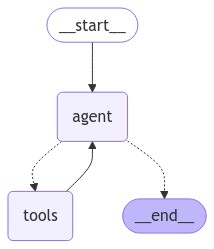

In [130]:
class State(TypedDict):
    input: str
    messages: Annotated[list, add_messages]
    
def should_continue(state: State):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        print("Using tools")
        return "tools"
    return END


def call_model(state: State):
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}


builder = StateGraph(State)

# Define the two nodes we will cycle between
builder.add_node("agent", call_model)
builder.add_node("tools", tool_node)

builder.set_entry_point("agent")

builder.add_conditional_edges("agent", should_continue, ["tools", END])
builder.add_edge("tools", "agent")

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [80]:
thread = {"configurable": {"thread_id": "1"}}
state=State()
state["messages"]=["What is the weather in Zurich today"]
# Invoke the graph to process the user input
state = graph.invoke(state, thread)

Using tools
Inside serper_search_tool


In [81]:
print(state["messages"][-1])

content='The weather in Zurich today is 51°F with cloudy conditions. You can find more details on [weather.com](https://www.weather.com/wx/today/?lat=47.38&lon=8.54&locale=en_US&par=google).' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 2013, 'total_tokens': 2067, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-4210b8e7-f9dd-417d-a20e-71726ef5d2f6-0' usage_metadata={'input_tokens': 2013, 'output_tokens': 54, 'total_tokens': 2067}


# Exercise: Build a graph with 2 nodes

First node generates two different perspectives for some political event (example: who is to blame for the war in Ukraine)

Second node generates a variety of sources that support each perspective

## Solution

graph initialized


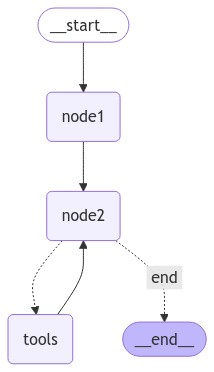

In [131]:
def get_SYS_PROMPT ():
    
    SYS_PROMPT = """ 
    You are a political science researcher with expertise in global politics and critical analysis. 
    Your goal is to objectively present multiple perspectives on political issues, including examining 
    influences from Western powers when relevant.
    """
  
    return SYS_PROMPT

def get_USER_PROMPT (query):
    USER_PROMPT = f""" 
    Analyze the topic: '{query}' by presenting two contrasting perspectives. 
    For each perspective, provide a concise summary that highlights key arguments and positions. 
    Additionally, examine the influence of Western powers on each perspective.
    
    Expected Output:
    - Brief summary of Perspective 1
    - Brief summary of Perspective 2
    """
    return USER_PROMPT


def get_SOLVE_PROMPT (essay):
    SOLVE_PROMPT =f""" 
    Use the provided search tool to find sources for the two different perspectives in the following essay:
    {essay}
    Use the sources to refine the essay.
    
    """
    return SOLVE_PROMPT

class State(TypedDict):
    task:str
    answer:str
    messages: Annotated[list, add_messages]

def node1(state:State):
    print("Inside node 1")
    sys_prompt=get_SYS_PROMPT()
    user_prompt=get_USER_PROMPT(state["task"])
    
    messages = [
        SystemMessage(content=sys_prompt), 
        HumanMessage(content=user_prompt)  
    ]    
    answer=model.invoke(messages)
    solve_prompt=get_SOLVE_PROMPT(answer)
    return {"messages":solve_prompt,"answer":answer} 

def node2(state:State):
    print("Inside node 2")
    answer=model_with_tools.invoke(state["messages"])
    return {"messages": answer} 


# Define the function that determines whether to continue or not
def should_continue(state):
    messages = state["messages"]
    last_message = messages[-1]
    # If there is no function call, then we finish
    if not last_message.tool_calls:
        print("the end")
        return "end"
    else:
        return "tools"

def init_graph():
    print("graph initialized")
    memory = MemorySaver()
    graph_builder = StateGraph(State)    
    graph_builder.add_node("node1", node1)
    graph_builder.add_node("node2", node2)
    graph_builder.add_edge("node1", "node2")
    
    graph_builder.add_node("tools", tool_node)
    graph_builder.add_conditional_edges(
        "node2",
#        tools_condition,
#        {"action": "tools", "__end__": "node3"},
        should_continue,
        {"tools":"tools","end":END}
    )


    
# Any time a tool is called, we return to the chatbot to decide the next step
    graph_builder.add_edge("tools", "node2")

    graph_builder.set_entry_point("node1")
     
    graph = graph_builder.compile(checkpointer=memory)
    return graph
    
def run_graph(state,graph):       
        thread = {"configurable": {"thread_id": "1"}}
        state = graph.invoke(state,thread)
        return state

graph=init_graph()

display(Image(graph.get_graph().draw_mermaid_png()))


In [127]:
state=State()
state["task"] ="Who is to blame for the war in Syria."
state=run_graph(state,graph)

Inside node 1
Inside node 2
Inside serper_search_tool
Inside serper_search_tool
Inside node 2
the end


In [128]:
for i in state["messages"]:
    print("tool name",i.name)
    print("content",i.content)

tool name None
content  
    Use the provided search tool to find sources for the two different perspectives in the following essay:
    content="Perspective 1: Blaming the Assad Regime and its Allies\n\nSummary: This perspective places the primary blame for the war in Syria on the Assad regime and its allies, including Russia and Iran. Proponents argue that the Assad government's brutal crackdown on peaceful protests in 2011, its use of chemical weapons against civilians, and its systematic human rights abuses have fueled the conflict. They also point to Russia and Iran's military and financial support to the Assad regime as exacerbating the violence and prolonging the war. Western powers are seen as having a limited influence in stopping the conflict due to geopolitical complexities and competing interests in the region.\n\nInfluence of Western Powers: Western powers, particularly the United States and European countries, have condemned the Assad regime's actions and supported opposi

In [129]:
answer=state["messages"][-1].content
print(answer)

### Sources for Refining the Essay:

#### Perspective 1: Blaming the Assad Regime and its Allies
1. [Who is to Blame for Syria? - Middle East Policy Council](https://mepc.org/commentaries/who-blame-syria/)
2. [Syria Timeline: Since the Uprising Against Assad - USIP](https://www.usip.org/syria-timeline-uprising-against-assad)
3. [Syria: Freedom in the World 2023 Country Report - Freedom House](https://freedomhouse.org/country/syria/freedom-world/2023)
4. [Syrian President Bashar al-Assad: Facing down rebellion - BBC News](https://www.bbc.com/news/10338256)
5. [2022 Country Reports on Human Rights Practices: Syria - State.gov](https://www.state.gov/reports/2022-country-reports-on-human-rights-practices/syria/)
6. [Why does the US want to remove Assad from power? - Reddit](https://www.reddit.com/r/geopolitics/comments/8b8jrz/why_does_the_us_want_to_remove_assad_from_power/)
7. [Syria: Denial as a war strategy | ISIL/ISIS - Al Jazeera](https://www.aljazeera.com/opinions/2016/9/27/syria-den

In [118]:
import re
def structure_output(text):
    # Regular expression to find titles and URLs
    pattern = r'\[(.*?)\]\((.*?)\)'
    
    # Find all matches
    matches = re.findall(pattern, text)
    
    # Organize results
    sources = {"Russia's Role": matches[:5], "Ukraine's Role": matches[5:]}
    
    # Initialize output list
    output = []
    
    # Display results and add them to the output list
    for category, items in sources.items():
        output.append(f"\n### {category} ###")
        for i, (title, url) in enumerate(items, start=1):
            print(f"{i}. Title: {title}\n   URL: {url}")
            output.append(f"{i}. Title: {title}\n   URL: {url}")
    return output         
out= structure_output(answer)       

1. Title: Why the Ukraine Crisis Is the West's Fault - John Mearsheimer
   URL: https://www.mearsheimer.com/wp-content/uploads/2019/06/Why-the-Ukraine-Crisis-Is.pdf
2. Title: Why John Mearsheimer Blames the U.S. for the Crisis in Ukraine
   URL: https://www.newyorker.com/news/q-and-a/why-john-mearsheimer-blames-the-us-for-the-crisis-in-ukraine
3. Title: My Country, Right or Wrong: Russian Public Opinion on Ukraine
   URL: https://carnegieendowment.org/2022/09/07/my-country-right-or-wrong-russian-public-opinion-on-ukraine-pub-87803
4. Title: Trump blames Ukraine's Zelenskiy for starting war with Russia
   URL: https://www.reuters.com/world/trump-blames-ukraines-zelenskiy-starting-war-with-russia-2024-10-17/
5. Title: Ukraine: Conflict at the Crossroads of Europe and Russia
   URL: https://www.cfr.org/backgrounder/ukraine-conflict-crossroads-europe-and-russia


# Panel app 

In [132]:
class Search_App():
    def __init__(self):
        self.state=State()
        self.graph = init_graph()


    def Run_Agent(self,query):
        print("Run_agent",query)
        self.state["task"]=query
        self.state=run_graph(state,graph)       
        answer2=structure_output(self.state["messages"][-1].content)
        answer1=self.state["answer"]
        print(answer1)
        return [answer1,answer2]


app=Search_App()

query = pn.widgets.TextInput(name="Query", placeholder="Enter the task", sizing_mode="stretch_width")
# Define buttons and output panes
start_button = pn.widgets.Button(name="Answer", button_type="primary", width=50, height=50)
output1 = pn.Column(
    pn.pane.Markdown("Answer"))
output2 = pn.Column(
    pn.pane.Markdown("Sources"))

def start_button_click(event):
    if start_button.clicks > 0:
        bound_function = pn.bind(app.Run_Agent,query.value)
        try:
            result = bound_function()
            print("re",result[0])
            output1.objects = [pn.pane.Markdown(f"Answer:\n {result[0]}")]
            output2.objects = [pn.pane.Markdown(f"Sources:\n {result[1]}")]
        except Exception as e:
            output1.objects = [pn.pane.Markdown(f"Error in start_button_click: {e}")]
            output2.objects = [pn.pane.Markdown(f"Error in start_button_click: {e}")]
start_button.on_click(start_button_click)

column = pn.Column(
    pn.Row(query),

    pn.panel(start_button, loading_indicator=True, height=50),
    pn.layout.Divider(),
    pn.panel(output1, loading_indicator=True, height=300),
    pn.panel(output2, loading_indicator=True, height=300),
    sizing_mode="stretch_width"
)

layout = pn.Column(pn.Tabs(('Answer',column)))
layout.show()                  

graph initialized
Launching server at http://localhost:60761


Run_agent Who is to blame for the war in Syria
Inside node 1
Inside node 2
Inside serper_search_tool
Inside serper_search_tool
Inside node 2
the end
1. Title: Who is to Blame for Syria? - Middle East Policy Council
   URL: https://mepc.org/commentaries/who-blame-syria/
2. Title: Syria Timeline: Since the Uprising Against Assad - USIP
   URL: https://www.usip.org/syria-timeline-uprising-against-assad
3. Title: Syria: Freedom in the World 2023 Country Report - Freedom House
   URL: https://freedomhouse.org/country/syria/freedom-world/2023
4. Title: Syrian President Bashar al-Assad: Facing down rebellion - BBC News
   URL: https://www.bbc.com/news/10338256
5. Title: Syria: Denial as a war strategy | ISIL/ISIS - Al Jazeera
   URL: https://www.aljazeera.com/opinions/2016/9/27/syria-denial-as-a-war-strategy
1. Title: Assad Regime Supported the Islamic State - The Washington Institute
   URL: https://www.washingtoninstitute.org/media/4698
2. Title: Is the Assad regime to blame? – DW – 04/06/2